1. MNIST Dataset will be used
2. Make our first Fully connected Neural Network / Artificial Neural Network / Multi-layer Preceptron
3. Training and Evaluation

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # plotting library
%matplotlib inline

# Importing Dataset

In [3]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train
y_train
x_test
y_test
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 2s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Data visualization

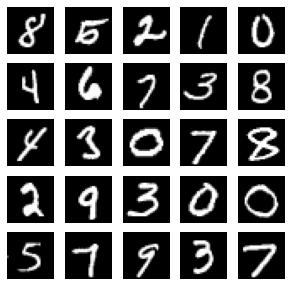

In [4]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

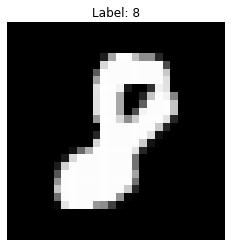

In [5]:
index = np.random.randint(0, x_train.shape[0])
image = x_train[index]
label = y_train[index]

# Display image with label
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

# Model Designing Part

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [9]:
from tensorflow.keras.utils import to_categorical  # Modern TF import




y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check the result
print("Original y_train shape:", y_train.shape)  # (60000, 10)
print("Sample one-hot label:", y_train[0])

Original y_train shape: (60000, 10)
Sample one-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [11]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255#255 because it is grey scale
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [12]:
# network parameters
batch_size = 128
hidden_units = 256

In [13]:
from keras.models import Sequential
from keras.layers import Dense , Activation

In [14]:
model = Sequential()
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 26932

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

TypeError: to_categorical() got an unexpected keyword argument 'to_file'

In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2626 - accuracy: 0.9230
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9700
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9796
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0462 - accuracy: 0.9855
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0204 - accuracy: 0.9934
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0174 - accuracy: 0.9938
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0118 - accuracy: 0.9962

In [18]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9804

Test accuracy: 98.0%


In [19]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# create a confusion matrix to visually represent incorrectly classified images
def plot_confusion_matrix(y_true, y_pred, classes, out_path=""):
    cm = confusion_matrix(y_true, y_pred,normalize="true")
    df_cm = pd.DataFrame(cm, index=[i for i in classes], columns=[i for i in classes])
    plt.figure(figsize=(12, 12))
    ax = sn.heatmap(df_cm, annot=True, linewidths=.125,cmap="Blues" ,cbar_kws={"shrink": 1})
    return ax

In [20]:
labels=['0',
'1',
'2',
'3',
'4',
'5',
'6',
'7',
'8',
'9',]

313/313 [==============================] - 0s 1ms/step


<AxesSubplot:>

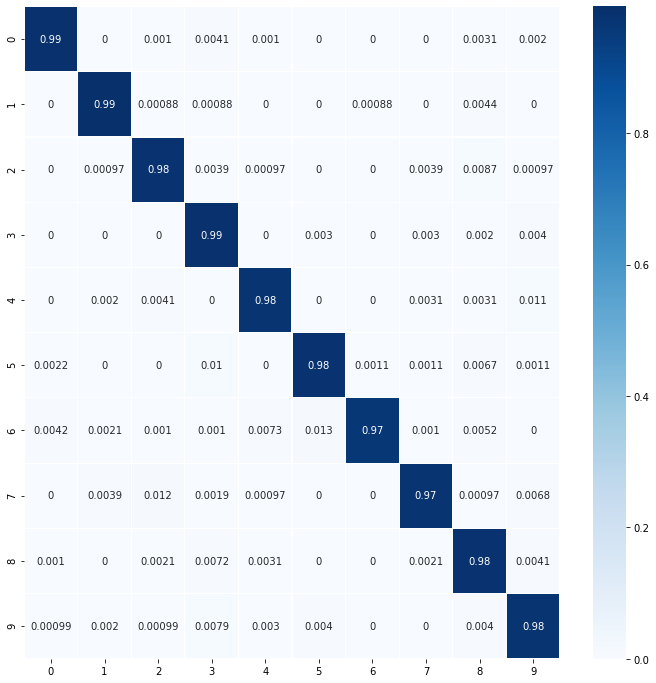

In [21]:
y_pred=model.predict(x_test)
plot_confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1),labels)